In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "/content/drive/My Drive/Datasets/"

In [3]:
!pip install keras==2.2.4
!pip install tensorflow==1.12.0

import numpy as np 
import pandas as pd
import string
from tqdm import tqdm
import math,nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import  hstack
# from handFeaturesV6 import hand_features, clean, get_tokenized_lemmas, remove_stopwords
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, concatenate,Flatten,LSTM, Embedding, Input,Dropout
from keras.models import Model
# from WF_gw2v_embedding import gw2v_sentence_embeddings
from keras.callbacks import ModelCheckpoint
import os
import re
import nltk
import string
import numpy as np
from sklearn import feature_extraction
from tqdm import tqdm
from keras.models import load_model
from sklearn.model_selection import train_test_split 
import time
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout,Embedding,LSTM
from sklearn.metrics import confusion_matrix
from keras.preprocessing import sequence
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras import optimizers
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport



     |████████████████████████████████| 317kB 2.7MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
     |████████████████████████████████| 83.1MB 54kB/s 
     |████████████████████████████████| 3.1MB 49.0MB/s 
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

In [4]:
hingstops= ['.', ',', '"', "'", '?','??', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%",'???']
stop_words= hingstops







df_bjp = pd.read_csv(path + "BJP.csv", encoding="ISO-8859-1")


def returneditedBJP (x): 
  comment = x.lower()
  if( (' rahul ' not in comment and 'rahul ' not in comment) and ' congress ' not in comment and ' cong ' not in comment):
    comment = ' BJP ' + comment
  elif ('rahul' in comment or ' rahul' in comment or 'rahul ' in comment):
    comment = comment.replace('rahul', ' BJP MODI ' )

  return comment

  


df_bjp['commentText'] =  df_bjp['commentText'].apply(lambda x : returneditedBJP(x)) 



def returnedited (x):
  comment = x.lower()
  if( (' modi ' not in comment or 'modi ' not in comment) and ' bjp ' not in comment):
    comment = ' CONGRESS ' + comment
    
  elif ( 'modi '  in comment or  ' modi' in comment) :
    comment = comment.replace('modi ', ' CONGRESS RAHUL ' )
    
  return comment

df_congress = pd.read_csv(path + "Congress.csv", encoding="ISO-8859-1")
df_congress = df_congress.rename(columns = {'ï»¿commentText':'commentText'})


df_congress['commentText'] =  df_congress['commentText'].apply(lambda x : returnedited(x)) 


#creating new column newlabel   
 
df_congress["newLabel"] = 0
df_congress.columns
print(df_bjp.head()  )
#df_bjp= df_congress
#df_bjp.head()
df_congress.newLabel[df_congress.Label == 0] =1
df_congress.newLabel[df_congress.Label == 1] =0
#dropping column label
df_congress.drop(columns="Label", inplace= True)
#renaming column newlabel to label
df_congress.rename(columns={"newLabel":"Label"} , inplace= True)

print(df_bjp.shape)
print(df_congress.shape)
#merging dataframes of bjp and congress
df_bjp = pd.concat([df_bjp, df_congress])

print(df_bjp.shape)
df_bjp.columns
df_bjp.reset_index(inplace= True)



                                       commentText  Label
0                     BJP banda apna 100 % best he      1
1   BJP we need the king maker  ---- narendra modi      1
2               BJP awesome... banda apna best hai      1
3                                 BJP best pm ever      1
4                   BJP MODI  gandhi left the chat      1
(1952, 2)
(1998, 2)
(3950, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize


tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

stemmer = SnowballStemmer('english')

wordnet_lemmatizer = WordNetLemmatizer()
    

  
def tokenize(text):
  wordlist= []
  for word in tokenizer.tokenize(text.lower()):
      wordlist.append(word) 
    # wordlisy.append(stemmer.stem(word))
  return wordlist

def remove_stopwords(l):
    # Removes stopwords from a list of tokens
    return [w for w in l if w not in feature_extraction.text.ENGLISH_STOP_WORDS]


titles=  df_bjp['commentText']
titles=remove_stopwords(titles)
labels= df_bjp['Label'].tolist()



def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()




[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


5825
Training Data size:  2765
Testing data size:  1185
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 300)           1747500   
_________________________________________________________________
lstm_2 (LSTM)                (None, 40, 100)           160400    
_________________________________________________________________
dense_29 (Dense)             (None, 40, 50)            5050      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 460)               920460    
_________________________________________________________________
dense_31 (Dense)             (None, 180)               82980     
_________________________________________________________________
dropout_13 (Dropout)

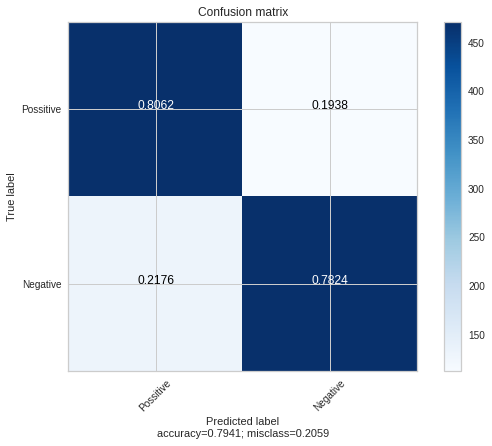

Classification Report : 
              precision    recall  f1-score   support

   Possitive       0.78      0.81      0.79       583
    Negative       0.81      0.78      0.79       602

    accuracy                           0.79      1185
   macro avg       0.79      0.79      0.79      1185
weighted avg       0.79      0.79      0.79      1185



In [0]:


def lstm(titles):

    tok= Tokenizer()
    tok.fit_on_texts(titles)


    vocab_size= len(tok.word_index)+1
    print(vocab_size)
    embed_len= 300
    embedd_matrix= np.zeros((vocab_size,embed_len))


    titles=tok.texts_to_sequences(titles)
    titles= pad_sequences(titles,maxlen= vocab_size,padding='post')


    labels= df_bjp['Label'].tolist()
    max_len=40

    X_train, X_test, y_train, y_test = train_test_split( titles, labels, test_size=0.25, random_state=42, shuffle= True)

    print("Training Data size: ", X_train.shape[0])
    print("Testing data size: ", X_test.shape[0])

    model= Sequential()
    model.add(Embedding(vocab_size,embed_len,input_length=titles.shape[1]))
    model.add(LSTM(100,return_sequences=True))
    model.add(Dense(50,activation='relu'))
    model.add(Flatten())
    model.add(Dense(460,activation='relu'))
    model.add(Dense(180,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))


    filepath=r"Hinglish_lstm_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
    callbacks_list = [checkpoint]


    model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
    model.summary()


    model.fit(np.array(X_train),np.array(y_train),epochs=10,batch_size=3,verbose=1,validation_split=0.1,callbacks=callbacks_list, shuffle=True)
    #model=load_model('model.h5')
    prediction= model.predict(X_test)

    YClass= np.zeros((len(prediction)))
    model.save("model_lstm.h5")

    for i in range(len(prediction)):
        if prediction[i][0]>=0.5:
            YClass[i]=1
        else:
            YClass[i]=0

    matrix1 = confusion_matrix(np.array(y_test), YClass)
    plot_confusion_matrix(cm=matrix1,target_names=['Possitive', 'Negative'])

    #Classification Report
    print("Classification Report : ")
    target_names = ['Possitive','Negative']
    print(classification_report(y_test, YClass, target_names=target_names))

lstm(titles)



In [19]:



def cnn(titles):
    tfidf_vect = TfidfVectorizer(ngram_range=(1,5),tokenizer = tokenize, max_features=5800)
    tfidf_vect.fit(titles)
    titleFeatures= tfidf_vect.transform(titles).toarray()
    print(titleFeatures.shape)
    
    labels= df_bjp['Label'].tolist()


    train_feat, test_feat, train_labels, test_labels= train_test_split(titleFeatures,labels,test_size= 0.25,shuffle=True)

    featureLen= train_feat.shape[1]


    model= Sequential()
    model.add(Dense(300,activation='relu', input_shape=(featureLen,)))
    model.add(Dense(160,activation='relu'))
    model.add(Dense(80,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))



    filepath=r"Hinglish-tfidf_cnn_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
    callbacks_list = [checkpoint]

    model.compile(loss = 'mse', optimizer='adam',metrics = ['accuracy'])

    model.summary()
   

    model.fit(train_feat,train_labels,epochs=10,batch_size=3,verbose=1,validation_split=0.1, shuffle=True,callbacks=callbacks_list)

    from sklearn.metrics import roc_curve
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, mlp.predict(X_test))

    from sklearn.metrics import roc_auc_score, auc
    from matplotlib import pyplot

    print("AUC: "+ str(auc(fpr_keras, tpr_keras)))

    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr_keras, tpr_keras, marker='.')
    # show the plot
    pyplot.show()

    prediction= model.predict(test_feat)
    YClass= np.zeros((len(prediction)))


    acc,scor= model.evaluate(test_feat,test_labels)

    print(acc, scor)
    
    model.save("model_cnn.h5")

    for i in range(len(prediction)):
        if prediction[i][0]>=0.5:
            YClass[i]=1
        else:
            YClass[i]=0

    matrix1 = confusion_matrix(test_labels, YClass)
    plot_confusion_matrix(cm=matrix1,target_names=['Possitive', 'Negative'])
    #Classification Report
    print("Classification Report : ")
    target_names = ['Possitive','Negative']
    print(classification_report(test_labels, YClass, target_names=target_names))
    
    

cnn(titles)



/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3950, 5800)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 300)               1740300   
_________________________________________________________________
dense_55 (Dense)             (None, 160)               48160     
_________________________________________________________________
dense_56 (Dense)             (None, 80)                12880     
_________________________________________________________________
dense_57 (Dense)             (None, 50)                4050      
_________________________________________________________________
dense_58 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 21        
Total params: 1,806,431
Trainable params: 1,806,431
Non-trainable params: 0
_____________________________________________________

NameError: ignored

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


(2962, 5800) (2962,)
(988, 5800) (988,)
Found 5824 unique tokens.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 5800, 150)         870000    
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 5796, 64)          48064     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 1449, 64)          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 1448, 64)          8256      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 362, 64)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 65        
Total para

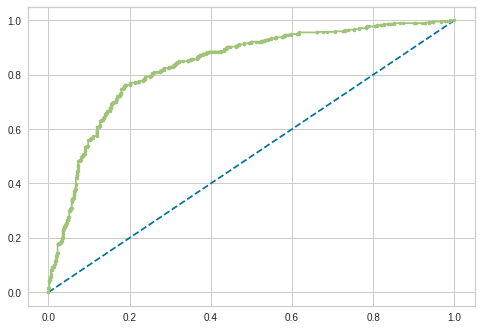

988/988 [==============================] - 29s 29ms/step
1.1534011933485024 0.7834008092339705


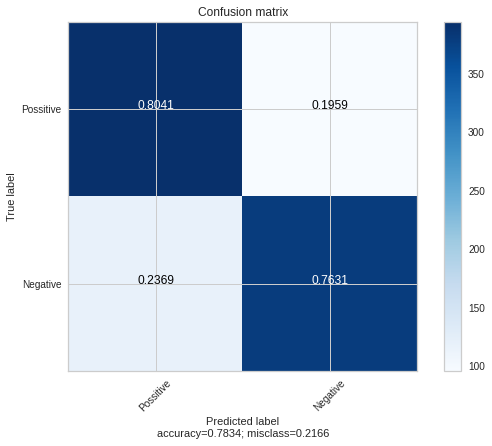

Classification Report : 
              precision    recall  f1-score   support

   Possitive       0.77      0.80      0.79       490
    Negative       0.80      0.76      0.78       498

    accuracy                           0.78       988
   macro avg       0.78      0.78      0.78       988
weighted avg       0.78      0.78      0.78       988



In [20]:
def cnn_lstm():
    max_fatures = 5800 #or vocab size
    #Keras tokenizer 
    tokenizer = Tokenizer(nb_words=max_fatures, split=' ', )
    tokenizer.fit_on_texts(titles)
    X1 = tokenizer.texts_to_sequences(titles)
    X1 = sequence.pad_sequences(X1, maxlen= max_fatures)
    Y1 = (df_bjp.Label).values #pd.get_dummies
    #Train test split
    X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.25, random_state = 42)
    print(X1_train.shape,Y1_train.shape)
    print(X1_test.shape,Y1_test.shape)
    word_index = tokenizer.word_index
    print('Found %s unique tokens.' % len(word_index))
    embed_dim = 150
    lstm_out = 500
    model = Sequential()
    model.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1], dropout=0.1))
    model.add(Conv1D(64, kernel_size = 5, activation='relu')) # 128 * 128 5 FILTERS i/p - 10 filters +1 = 491
    model.add(MaxPooling1D(pool_size=4)) # 4 LAYERS OF POOLING
    model.add(Conv1D(64, kernel_size = 2, activation='relu'))
    model.add(MaxPooling1D(pool_size=4))
    model.add(LSTM(64,  return_sequences = False))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
    print(model.summary())
    start_time = time.clock()
    model.save('cnn_lstm.h5')
    model.fit(X1_train,Y1_train,batch_size=30,epochs=15,verbose=1,validation_split=0.1, shuffle=True)
    print (time.clock() - start_time, "seconds")
    from sklearn.metrics import roc_curve
    y_pred_keras = model.predict(X1_test).ravel()
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y1_test, model.predict(X1_test))
    from sklearn.metrics import roc_auc_score
    from matplotlib import pyplot
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr_keras, tpr_keras, marker='.')
    # show the plot
    pyplot.show()
    #Confusion Matrix
    prediction= model.predict(X1_test)
    YClass= np.zeros((len(prediction)))
    acc,scor= model.evaluate(X1_test,Y1_test)
    print(acc, scor)
    model.save("model_cnn.h5")

    for i in range(len(prediction)):
        if prediction[i][0]>=0.5:
            YClass[i]=1
        else:
            YClass[i]=0

    matrix1 = confusion_matrix(Y1_test, YClass)
    plot_confusion_matrix(cm=matrix1,target_names=['Possitive', 'Negative'])
    #Classification Report
    print("Classification Report : ")
    target_names = ['Possitive','Negative']
    print(classification_report(Y1_test, YClass, target_names=target_names))
cnn_lstm()


Train on 2844 samples, validate on 316 samples
Epoch 1/30
2844/2844 [==============================] - 4s 1ms/step - loss: 0.6847 - acc: 0.6206 - val_loss: 0.6703 - val_acc: 0.6361
Epoch 2/30
2844/2844 [==============================] - 2s 659us/step - loss: 0.5966 - acc: 0.7975 - val_loss: 0.5694 - val_acc: 0.7057
Epoch 3/30
2844/2844 [==============================] - 2s 653us/step - loss: 0.3935 - acc: 0.8639 - val_loss: 0.4644 - val_acc: 0.7911
Epoch 4/30
2844/2844 [==============================] - 2s 653us/step - loss: 0.2476 - acc: 0.9212 - val_loss: 0.4959 - val_acc: 0.7911
Epoch 5/30
2844/2844 [==============================] - 2s 658us/step - loss: 0.1809 - acc: 0.9434 - val_loss: 0.5453 - val_acc: 0.7880
Epoch 6/30
2844/2844 [==============================] - 2s 665us/step - loss: 0.1372 - acc: 0.9603 - val_loss: 0.5674 - val_acc: 0.7911
Epoch 7/30
2844/2844 [==============================] - 2s 650us/step - loss: 0.1109 - acc: 0.9655 - val_loss: 0.6668 - val_acc: 0.7627
Epo

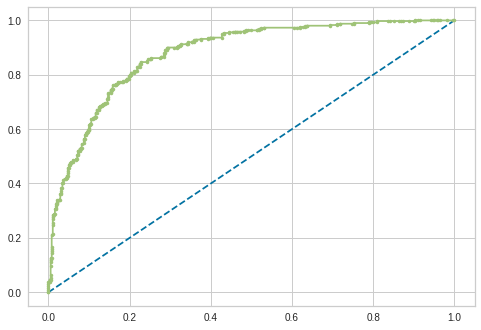

790/790 [==============================] - 0s 313us/step
0.889463359117508 0.7987341775169855


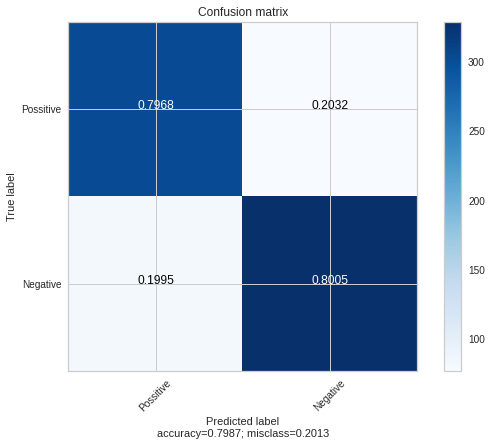

Classification Report : 
              precision    recall  f1-score   support

   Possitive       0.79      0.80      0.79       379
    Negative       0.81      0.80      0.81       411

    accuracy                           0.80       790
   macro avg       0.80      0.80      0.80       790
weighted avg       0.80      0.80      0.80       790



In [17]:

def mlp():
    vectorizer = TfidfVectorizer(stop_words = stop_words,tokenizer = tokenize, max_features = 5300, ngram_range=(1,2), lowercase= True)
    tfdf = vectorizer.fit_transform(titles)
    words = vectorizer.get_feature_names()
    y= df_bjp.Label
    X_train, X_test, y_train, y_test = train_test_split( tfdf, y, test_size=0.2, random_state=42)
    mlp = Sequential()
    mlp.add(Dense(500, input_dim=5300, activation='relu'))
    mlp.add(Dropout(0.1))
    mlp.add(Dense(550, activation='relu'))
    mlp.add(Dropout(0.1))

    mlp.add(Dense(100, activation='relu'))
    mlp.add(Dropout(0.1))

    mlp.add(Dense(10, activation='relu'))
    mlp.add(Dropout(0.1))
    mlp.add(Dense(1, activation='sigmoid'))

    opt =optimizers.adamax(lr=0.001)
    mlp.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    start_time = time.clock()


    # Fit the model
    mlp.fit(X_train, y_train, epochs=30, batch_size=150,verbose=1,validation_split=0.1, shuffle=True )

    from sklearn.metrics import roc_curve
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, mlp.predict(X_test))

    from sklearn.metrics import roc_auc_score, auc
    from matplotlib import pyplot

    print("AUC: "+ str(auc(fpr_keras, tpr_keras)))

    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr_keras, tpr_keras, marker='.')
    # show the plot
    pyplot.show()

    prediction= mlp.predict(X_test)
    YClass= np.zeros((len(prediction)))
    acc,scor= mlp.evaluate(X_test,y_test)
    print(acc, scor)
    mlp.save("model_mlp.h5")

    for i in range(len(prediction)):
        if prediction[i][0]>=0.5:
            YClass[i]=1
        else:
            YClass[i]=0

    matrix1 = confusion_matrix(y_test, YClass)
    plot_confusion_matrix(cm=matrix1,target_names=['Possitive', 'Negative'])
    #Classification Report
    print("Classification Report : ")
    target_names = ['Possitive','Negative']
    print(classification_report(y_test, YClass, target_names=target_names))
mlp()